<a href="https://colab.research.google.com/github/eliasfrivas/Colab/blob/main/ProyectoDS_Partel_Rivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
#3 graficos de seaborn y 3 graficos de matplot
#explicacion del data set elegido
#hipotesis y solucion del dataset


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT--Iw_aY43yv6z1hgffZlW8i9DswAVpYdAz3i2AY1j9AsDmr6uHF-dcNhEvrX-QhVqbcNhtW5I9V8y/pub?gid=1088532269&single=true&output=csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [10]:
df.shape #Filas y columnas

(16719, 16)

In [17]:
conteo_games = df['Name'].value_counts()
print(conteo_games)

Name
Need for Speed: Most Wanted    12
Ratatouille                     9
Madden NFL 07                   9
FIFA 14                         9
LEGO Marvel Super Heroes        9
                               ..
Nintendogs                      1
Duck Hunt                       1
New Super Mario Bros. Wii       1
Wii Play                        1
New Super Mario Bros.           1
Name: count, Length: 11562, dtype: int64


In [26]:
conteo_genero = df['Genre'].value_counts()
print(conteo_genero)

Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64


In [28]:
conte_genero = df.groupby('Genre')['User_Score'].sum()
print(conte_genero)

Genre
Action          12908.9
Adventure        2139.9
Fighting         2913.7
Misc             2993.7
Platform         3125.0
Puzzle            918.4
Racing           4510.2
Role-Playing     5661.3
Shooter          6506.7
Simulation       2454.3
Sports           7678.2
Strategy         2268.8
Name: User_Score, dtype: float64


<ipython-input-42-6d05dbc93791>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


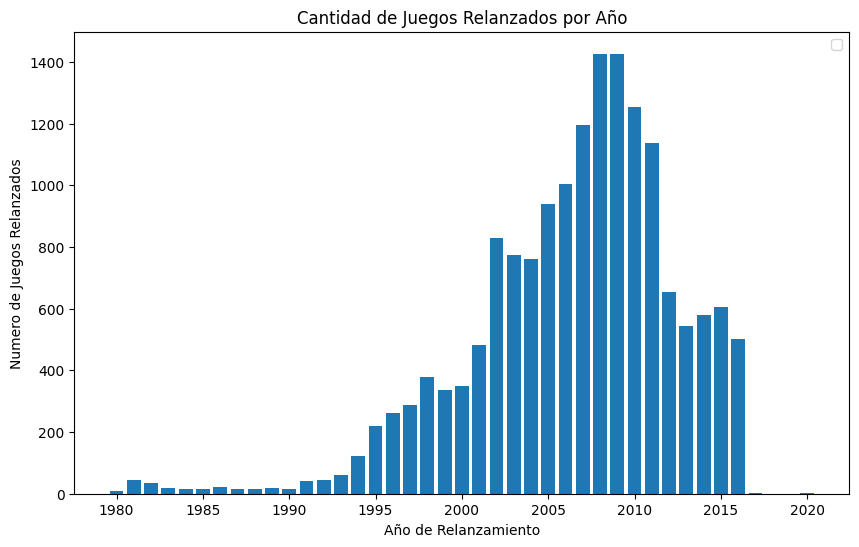

In [42]:
plt.figure(figsize=(10, 6))
#plt.plot(df['Year_of_Release'], sum(conteo_año))
plt.bar(conteo_año.index, conteo_año.values)
plt.xlabel("Año de Relanzamiento")
plt.ylabel("Numero de Juegos Relanzados")
plt.title("Cantidad de Juegos Relanzados por Año")
plt.legend()
plt.show()

In [35]:
conteo_año = df['Year_of_Release'].value_counts()
print(conteo_año)

Year_of_Release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: count, dtype: int64


In [43]:
print(sum(conteo_año))

16450


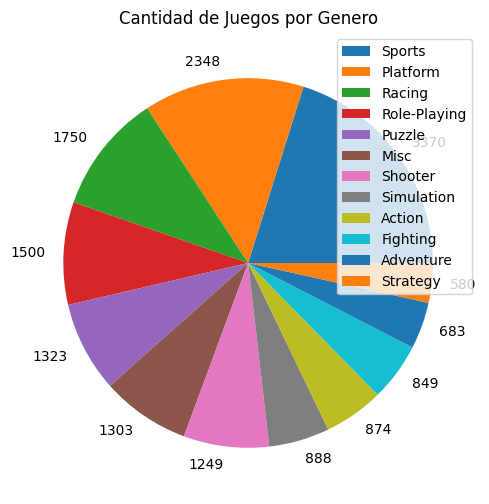

In [58]:
plt.figure(figsize=(10, 6))
plt.pie(df['Genre'].value_counts(), labels=df['Genre'].value_counts())
plt.title("Cantidad de Juegos por Genero")
plt.legend(df['Genre'].unique())
plt.show()

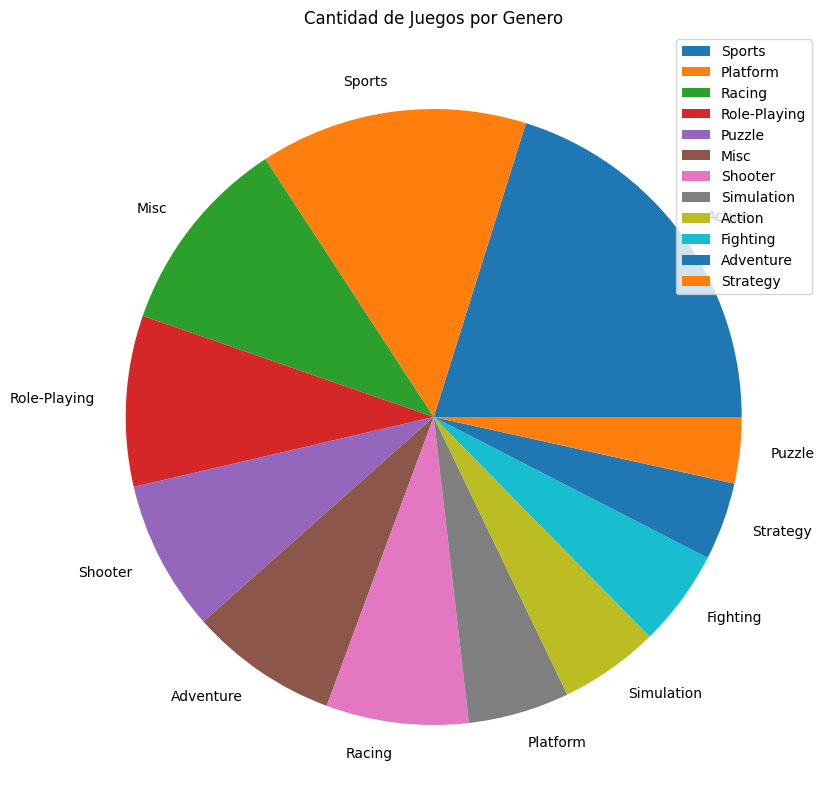

In [65]:
plt.figure(figsize=(10, 10))
plt.pie(df['Genre'].value_counts(), labels=df['Genre'].value_counts().index)
plt.title("Cantidad de Juegos por Genero")
plt.legend(df['Genre'].unique())
plt.show()